In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings 
warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv("C:\\Users\\pc\\Downloads\\archive (16)\\Dataset-SA.csv")

In [9]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [10]:
data.shape

(205052, 6)

In [12]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def clean(text):
    text = re.sub(r'\[.*?\]', '', str(text).lower()) 
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text) 
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub(r'\n', '', text) 
    text = re.sub(r'\w*\d\w*', '', text)
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stopword])
    return text
data["product_name"] = data["product_name"].apply(clean)

In [14]:
data["product_name"][0]

'cand l roomperson air coolerwhit black eleg high speedhoney comb cool pad ice chamber blower'

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [18]:
#product_price are object ,need convert float
data["product_price"] = pd.to_numeric(data["product_price"], errors='coerce')
data = data.dropna(subset=["product_price"])
data["product_price"] = data["product_price"].astype(float)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,cand l roomperson air coolerwhit black eleg hi...,3999.0,5,super!,great cooler excellent air flow and for this p...,positive
1,cand l roomperson air coolerwhit black eleg hi...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,positive
2,cand l roomperson air coolerwhit black eleg hi...,3999.0,3,fair,the quality is good but the power of air is de...,positive
3,cand l roomperson air coolerwhit black eleg hi...,3999.0,1,useless product,very bad product its a only a fan,negative
4,cand l roomperson air coolerwhit black eleg hi...,3999.0,3,fair,ok ok product,neutral


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205049 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_name   205049 non-null  object 
 1   product_price  205049 non-null  float64
 2   Rate           205049 non-null  object 
 3   Review         180385 non-null  object 
 4   Summary        205038 non-null  object 
 5   Sentiment      205049 non-null  object 
dtypes: float64(1), object(5)
memory usage: 11.0+ MB


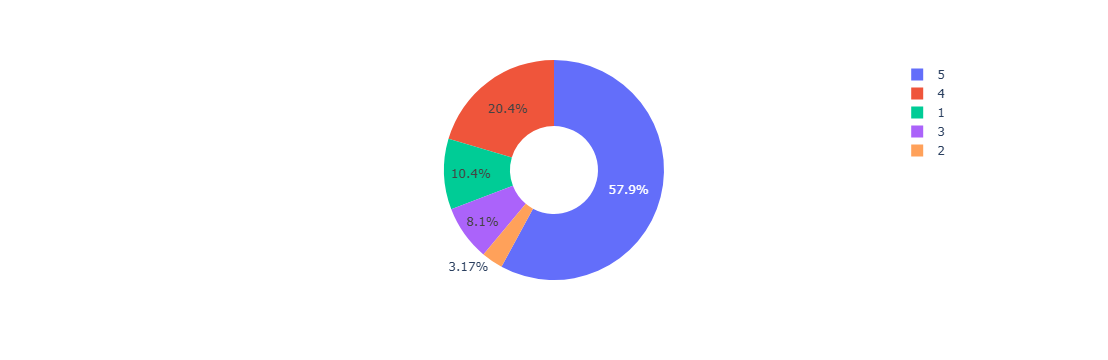

In [22]:
ratings = data["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.4)
figure.show()

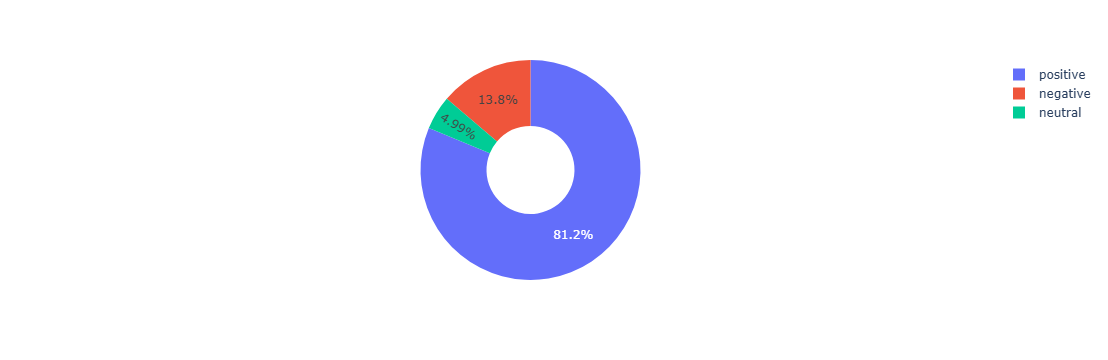

In [26]:
sentiment = data["Sentiment"].value_counts()
numbers = sentiment.index
quantity = sentiment.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.4)
figure.show()

In [25]:
len(data["Review"].value_counts())

1321

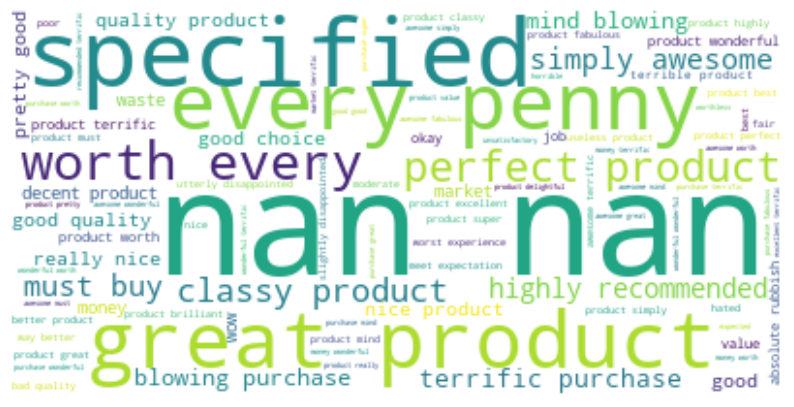

In [29]:
#Review  are some  float points
text = " ".join(str(i) for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Review'] = data['Review'].astype(str)
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
data.head()

,Review,Positive,Negative,Neutral
0,super!,1.0,0.000,0.000
1,awesome,1.0,0.000,0.000
2,fair,1.0,0.000,0.000
3,useless product,0.0,0.737,0.263
4,fair,1.0,0.000,0.000


In [34]:
data.shape

(205049, 4)

In [35]:
x= sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Positive 😊 


In [36]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  109819.265
Negative:  11217.585
Neutral:  84012.154


In [37]:
data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["Review"]]

In [38]:
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

data["Sentiment"] = data["Compound"].apply(get_sentiment_label)

In [39]:
data = data[["Review", "Positive", "Negative", "Neutral", "Compound", "Sentiment"]]
data.head()

,Review,Positive,Negative,Neutral,Compound,Sentiment
0,super!,1.0,0.000,0.000,0.6360,Positive
1,awesome,1.0,0.000,0.000,0.6249,Positive
2,fair,1.0,0.000,0.000,0.3182,Positive
3,useless product,0.0,0.737,0.263,-0.4215,Negative
4,fair,1.0,0.000,0.000,0.3182,Positive


**1. What is the distribution of sentiments in the reviews?**

Sentiment
Positive    133107
Neutral      56929
Negative     15013
Name: count, dtype: int64


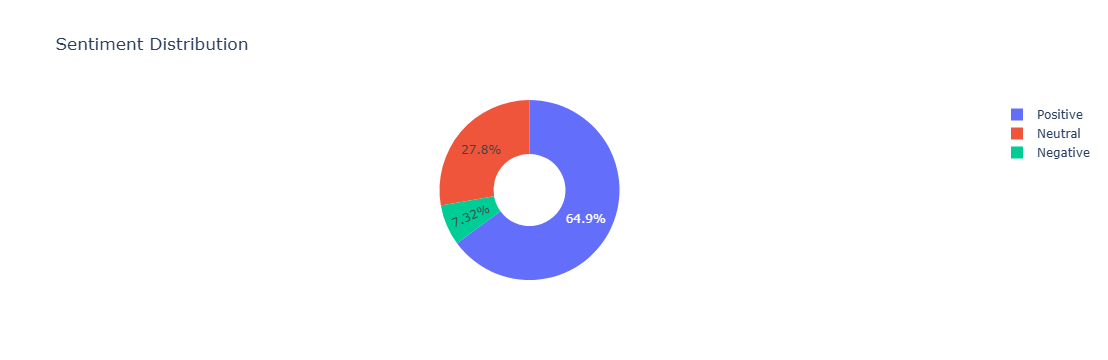

In [52]:
sentiment_distribution = data['Sentiment'].value_counts()
print(sentiment_distribution)
# Get values and names for the pie chart
numbers = sentiment_distribution.index
quantity = sentiment_distribution.values
# Create a pie chart with Plotly
figure = px.pie(values=quantity, names=numbers, hole=0.4, title='Sentiment Distribution')
figure.show()

**2. What are the average sentiment scores in the reviews?**

Positive    0.535576
Negative    0.054707
Neutral     0.409717
dtype: float64


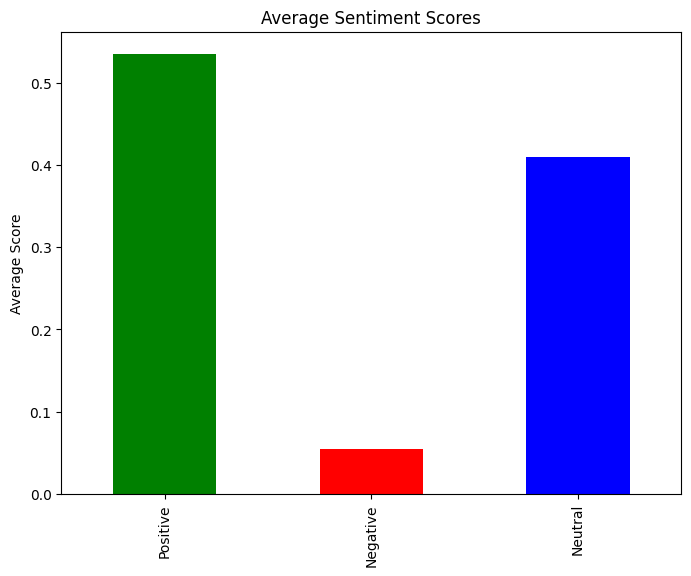

In [42]:
avg_scores = data[['Positive', 'Negative', 'Neutral']].mean()
print(avg_scores)
avg_scores.plot(kind='bar', figsize=(8, 6), color=['green', 'red', 'blue'])
plt.title('Average Sentiment Scores')
plt.ylabel('Average Score')
plt.show()


**3. Is there a relationship between review length and sentiment?**

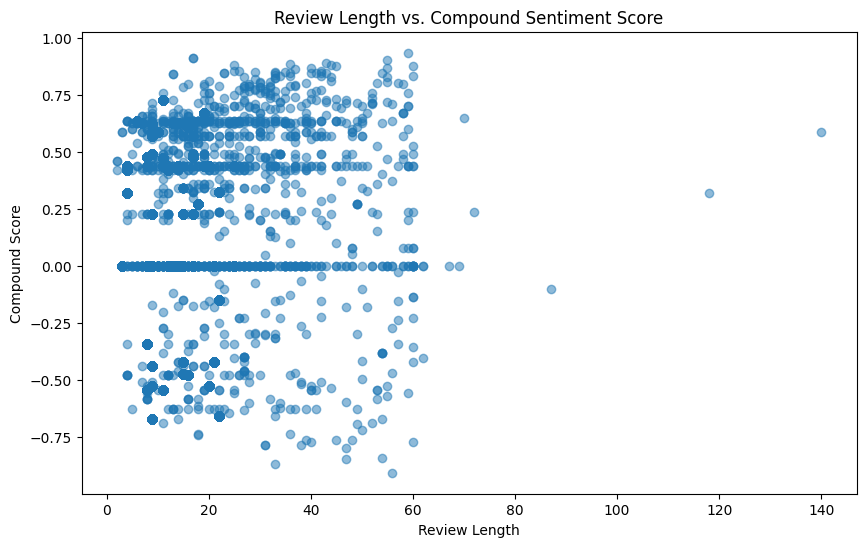

In [43]:
data['Review_Length'] = data['Review'].apply(len)
plt.figure(figsize=(10, 6))
plt.scatter(data['Review_Length'], data['Compound'], alpha=0.5)
plt.title('Review Length vs. Compound Sentiment Score')
plt.xlabel('Review Length')
plt.ylabel('Compound Score')
plt.show()

**4. Which reviews have the most positive and most negative sentiments?**

In [44]:
most_positive = data.loc[data['Compound'].idxmax()]
most_negative = data.loc[data['Compound'].idxmin()]

print("Most Positive Review:")
print(most_positive['Review'])
print("\nCompound Score:", most_positive['Compound'])

print("\nMost Negative Review:")
print(most_negative['Review'])
print("\nCompound Score:", most_negative['Compound'])

Most Positive Review:
superb product by bajaj & superb delivery by flipkart :) :)

Compound Score: 0.9349

Most Negative Review:
very very bad and worthless tv and i feel bad service tv

Compound Score: -0.9063


**5. What is the correlation between positive, negative, and neutral sentiment scores?**

          Positive  Negative   Neutral
Positive  1.000000 -0.351590 -0.880746
Negative -0.351590  1.000000 -0.133691
Neutral  -0.880746 -0.133691  1.000000


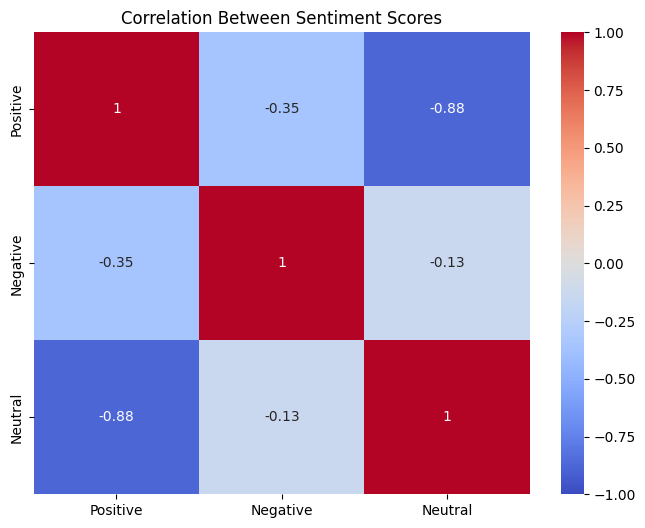

In [45]:
sentiment_correlation = data[['Positive', 'Negative', 'Neutral']].corr()
print(sentiment_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Sentiment Scores')
plt.show()

**6. Sentiment Distribution by Sentiment Category (Advanced Analysis)**

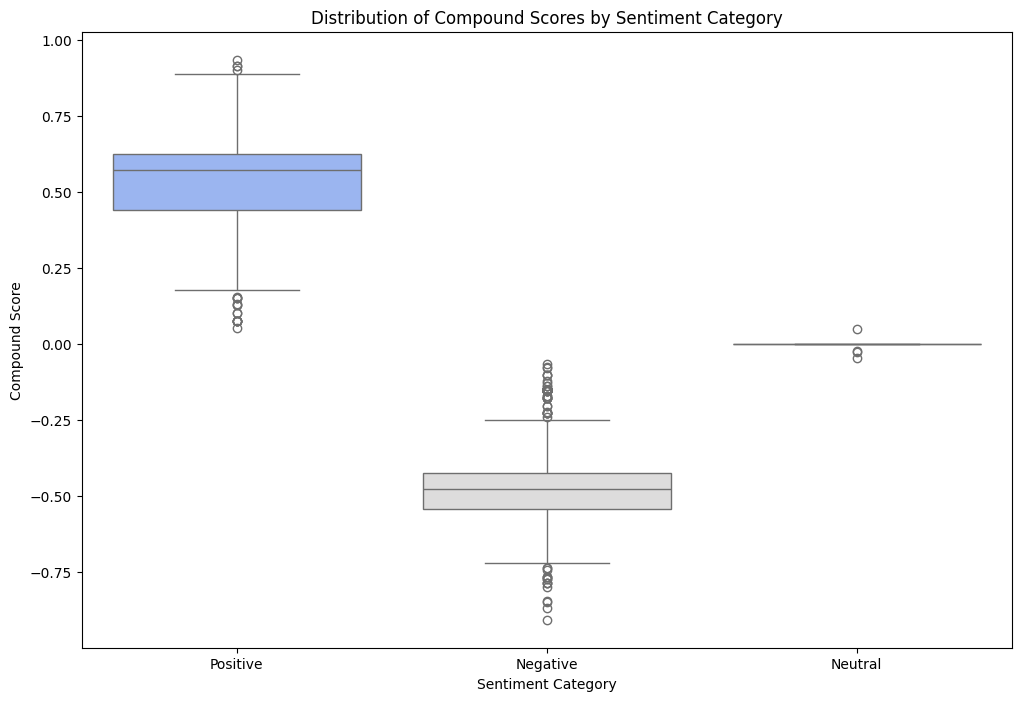

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sentiment', y='Compound', palette='coolwarm')
plt.title('Distribution of Compound Scores by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Compound Score')
plt.show()